# K-Means Clustering

Dataset information : 
- The  Lower the `Spending Score`, the lower the customer tends to spend. the Higher the score, the higher the customer spends.

- Here we want to identify some pattern. We don't know what to predict.

## Importing the libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

- Here last column is not actually a `Dependent` variable. so we have to modify some things from our data preprocssing templates (  *conventional method will not apply here:(*  )
- Here in order to visualise the clusters, we are only selecting two features. but in general, we have to take all the features in `X`.

In [15]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values  # dataset.iloc[:,3:5].values
# X = dataset.iloc[:, 1:].values   # In general implementation

In [16]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- Here we don't need to split the dataset in testing and training set. as we are only finding patterns in our dataset. here we don't have to predict anything too.

## Using the elbow method to find the optimal number of clusters
- with **WCSS** method
- `10` iterations for 10 clusters
- Here init method is by default `k-means++`, which is to avoid random initialization trap.

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(10):
  kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=42)   # Here init method is by default 'k-means++'. which is to avoid random initialization trap.
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)    # `inertia_` is same value as `WCSS`.

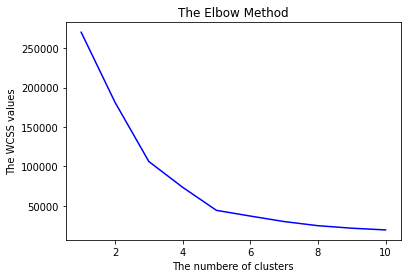

In [18]:
plt.plot(range(1,11),wcss, color='blue')
plt.title('The Elbow Method')
plt.xlabel('The numbere of clusters')
plt.ylabel('The WCSS values')
plt.show()

- From number `5`, the WCSS values decreases slowly. so `5` is the best!

## Training the K-Means model on the dataset
- Fixing cluster value as `5`

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)   # Here init method is by default 'k-means++'. which is to avoid random initialization trap.
y_kmeans = kmeans.fit_predict(X)  # Not only fits/trains the model, it also predict and returns the dependent variable.

# kmeans.fit(X) 
# y_kmeans = kmeans.predict(X) 

In [21]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

- RAW Visualisation : 

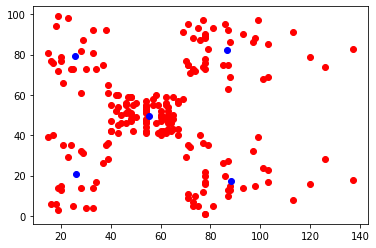

In [23]:
plt.scatter(X[:,0],X[:,1], color='red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='blue')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($...k)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- Clusters/Section Visualisation
  - `s` means size of the point
  - `label` is to give title to the specific cluster
  - `cluster_centers_` is a 2D array which has all the calculated centroid points.

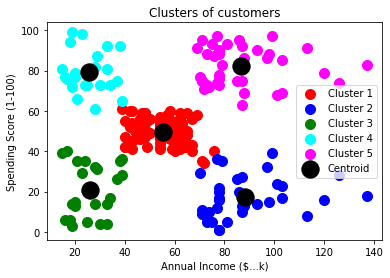

In [27]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], color='red', s=100, label='Cluster 1')    # `s` means size of the point
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], color='blue', s=100, label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], color='green', s=100, label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], color='cyan', s=100, label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], color='magenta', s=100, label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', s=300, label='Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($...k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- **Conclusion**
  - Here the cluster number 5 is reach family of customer so we can target them more
  - Considering MALL ethics, we should not target much the cluster 4 family, as their income is very low and they spend very.
  - We can start targting the cluster 2 family as their income is high but not spending more; we will never target the cluster 1 family as their income is low and they also tends not to spending much.